<a href="https://colab.research.google.com/github/ujjwalbb30/Ujjwal_DATA606/blob/main/notebooks/Step_3_A1_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing and importing required libraries**

In [1]:
# installing split-folders library to split the images dataset folders into training, validation and testing folders
!pip install split-folders

In [2]:
# importing required dependencies
# importing pandas, numpy, random, matplotlib and their required modules
import pandas as pd
import numpy as np
import random
from numpy.random import seed
seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# importing tensorflow, keras and their required modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# importing sklearn and their required modules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# importing other required libraries
import glob
import cv2
import skimage
from skimage.transform import resize
import os
import gc
import pickle
import splitfolders
import sys
import seaborn as sns
import PIL
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

##**Mounting the Drive and Copying the Data from Drive to Colab assigned machine**

From my previous experience, I have observed that copying the data to assigned colab machine helps in faster processing

In [3]:
# mounting the drive to access data files
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# defining the path of data in drive (path to copy the data from)
# defining the path where the data should be copied

drive_path = '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset'
local_path = '/content'

# copying the data from drive to machine
!cp -av '/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' '/content'

'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset' -> '/content/Dataset'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE' -> '/content/Dataset/ADVE'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000136188.jpg' -> '/content/Dataset/ADVE/0000136188.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0030048095.jpg' -> '/content/Dataset/ADVE/0030048095.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/0000556056.jpg' -> '/content/Dataset/ADVE/0000556056.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04106546.jpg' -> '/content/Dataset/ADVE/04106546.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04102204.jpg' -> '/content/Dataset/ADVE/04102204.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project_Ujjwal/Dataset/ADVE/04412344.jpg' -> '/content/Dataset/ADVE/04412344.jpg'
'/content/gdrive/MyDrive/DATA_606_Capstone_Project

##**Splitting the images dataset folder into train, validation and test images**
###creating train, validation and test dataframes of image paths and labels

In [5]:
# splitting the folder intro training, validation and test dataset
splitfolders.ratio("/content/Dataset", output="/content/Final_Dataset", seed=42, ratio=(.7, .1, .2), group_prefix=None)

Copying files: 3492 files [00:07, 455.95 files/s]


In [6]:
# Exploring the new created split dataset folder
dataset_folder_path = '/content/Final_Dataset'
for path, directories, files in os.walk(dataset_folder_path):
    print(path,'--> number of files : ', len(files))

/content/Final_Dataset --> number of files :  0
/content/Final_Dataset/train --> number of files :  0
/content/Final_Dataset/train/ADVE --> number of files :  161
/content/Final_Dataset/train/Report --> number of files :  186
/content/Final_Dataset/train/Note --> number of files :  141
/content/Final_Dataset/train/Letter --> number of files :  397
/content/Final_Dataset/train/Memo --> number of files :  434
/content/Final_Dataset/train/Form --> number of files :  302
/content/Final_Dataset/train/Resume --> number of files :  84
/content/Final_Dataset/train/Scientific --> number of files :  183
/content/Final_Dataset/train/News --> number of files :  132
/content/Final_Dataset/train/Email --> number of files :  420
/content/Final_Dataset/test --> number of files :  0
/content/Final_Dataset/test/ADVE --> number of files :  47
/content/Final_Dataset/test/Report --> number of files :  54
/content/Final_Dataset/test/Note --> number of files :  41
/content/Final_Dataset/test/Letter --> numbe

In [7]:
# Preparing train, validation and test dataframes of image paths and labels

# defining the path to train, validation and test images data folders
train_dataset_folder = '/content/Final_Dataset/train'
validation_dataset_folder = '/content/Final_Dataset/val'
test_dataset_folder = '/content/Final_Dataset/test'

# initializing empty lists to store paths and labels of train, validation and test images
train_data = []
val_data = []
test_data = []

# saving train images paths and labels
for folder in os.listdir(train_dataset_folder):
    label_folder = os.path.join(train_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    train_data += onlyfiles

# saving validation images paths and labels
for folder in os.listdir(validation_dataset_folder):
    label_folder = os.path.join(validation_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    val_data += onlyfiles

# saving test images paths and labels
for folder in os.listdir(test_dataset_folder):
    label_folder = os.path.join(test_dataset_folder, folder)
    onlyfiles = [{'label':folder,'path':os.path.join(label_folder, f)} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    test_data += onlyfiles

# creating dataframes from the lists
train_data_df = pd.DataFrame(train_data)
val_data_df = pd.DataFrame(val_data)
test_data_df = pd.DataFrame(test_data)

# viewing the details of training dataframe
print('training data:\n')
display(train_data_df)
print('\nunique labels:\n',train_data_df['label'].unique())
print('\n number of unique labels:\n',train_data_df['label'].nunique())

# viewing the details of validation dataframe
print('\nvalidation data:\n')
display(val_data_df)
print('\nunique labels:\n',val_data_df['label'].unique())
print('\n number of unique labels:\n',val_data_df['label'].nunique())

# viewing the details of testing dataframe
print('\ntesting data:\n')
display(test_data_df)
print('\nunique labels:\n',test_data_df['label'].unique())
print('\n number of unique labels:\n',test_data_df['label'].nunique())

training data:



,label,path
0,ADVE,/content/Final_Dataset/train/ADVE/89872610.jpg
1,ADVE,/content/Final_Dataset/train/ADVE/87003967_870...
2,ADVE,/content/Final_Dataset/train/ADVE/2084426012_6...
3,ADVE,/content/Final_Dataset/train/ADVE/2047920303.jpg
4,ADVE,/content/Final_Dataset/train/ADVE/2044759026.jpg
...,...,...
2435,Email,/content/Final_Dataset/train/Email/529046054+-...
2436,Email,/content/Final_Dataset/train/Email/2078208162b...
2437,Email,/content/Final_Dataset/train/Email/2082375116.jpg
2438,Email,/content/Final_Dataset/train/Email/2078379610a...



unique labels:
 ['ADVE' 'Report' 'Note' 'Letter' 'Memo' 'Form' 'Resume' 'Scientific'
 'News' 'Email']

 number of unique labels:
 10

validation data:



,label,path
0,ADVE,/content/Final_Dataset/val/ADVE/502607162+-716...
1,ADVE,/content/Final_Dataset/val/ADVE/2073971431.jpg
2,ADVE,/content/Final_Dataset/val/ADVE/502597916.jpg
3,ADVE,/content/Final_Dataset/val/ADVE/2072281108.jpg
4,ADVE,/content/Final_Dataset/val/ADVE/2084420704.jpg
...,...,...
341,Email,/content/Final_Dataset/val/Email/2085696947f_6...
342,Email,/content/Final_Dataset/val/Email/2077615469c.jpg
343,Email,/content/Final_Dataset/val/Email/2078560147.jpg
344,Email,/content/Final_Dataset/val/Email/2067238739.jpg



unique labels:
 ['ADVE' 'Report' 'Note' 'Letter' 'Memo' 'Form' 'Resume' 'Scientific'
 'News' 'Email']

 number of unique labels:
 10

testing data:



,label,path
0,ADVE,/content/Final_Dataset/test/ADVE/71408946.jpg
1,ADVE,/content/Final_Dataset/test/ADVE/2071466317_63...
2,ADVE,/content/Final_Dataset/test/ADVE/2041076526.jpg
3,ADVE,/content/Final_Dataset/test/ADVE/517950663+-06...
4,ADVE,/content/Final_Dataset/test/ADVE/2064932937.jpg
...,...,...
701,Email,/content/Final_Dataset/test/Email/2072948072a.jpg
702,Email,/content/Final_Dataset/test/Email/2078168491.jpg
703,Email,/content/Final_Dataset/test/Email/2083648580a.jpg
704,Email,/content/Final_Dataset/test/Email/2085754049c.jpg



unique labels:
 ['ADVE' 'Report' 'Note' 'Letter' 'Memo' 'Form' 'Resume' 'Scientific'
 'News' 'Email']

 number of unique labels:
 10


##**Building and Training the ResNet50 Model**

In [8]:
# creating image data generators

# defining image dimensions, batch size, target size of image, target dimensions and number of labels
img_dim = 224
batch_size = 32
epochs = 10
seed = 42
channels = 3
learning_rate = 0.1
target_size = (img_dim, img_dim)
target_dims = (img_dim, img_dim, 3)
num_classes = len(train_data_df['label'].unique())

# images are normalized, but not augmented

# train image generator
train_datagen = ImageDataGenerator(rescale = 1/255.0, horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
train_generator = train_datagen.flow_from_dataframe(dataframe=train_data_df,x_col='path', y_col='label', target_size=(img_dim, img_dim),class_mode='categorical', batch_size=batch_size, shuffle=False)

# validation image generator
validation_datagen = ImageDataGenerator(rescale = 1/255.0,horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
validation_generator = validation_datagen.flow_from_dataframe(dataframe=val_data_df, x_col='path', y_col='label', target_size=(img_dim, img_dim), class_mode='categorical', batch_size=batch_size, shuffle=False)

# testing image generator
test_datagen = ImageDataGenerator(rescale = 1/255.0,horizontal_flip=True, vertical_flip=True,brightness_range=[0.2,1.0])
test_generator = test_datagen.flow_from_dataframe(dataframe=test_data_df, x_col='path', y_col='label', target_size=(img_dim, img_dim), class_mode='categorical', batch_size=batch_size, shuffle=False)


Found 2432 validated image filenames belonging to 10 classes.
Found 344 validated image filenames belonging to 10 classes.
Found 706 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 8 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [9]:
base_model = ResNet50(weights = "imagenet", include_top=False, input_shape = (img_dim, img_dim, channels))

for layer in base_model.layers:
   layer.trainable = False
    
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 10)                1290      
                                                                 
Total params: 36,434,186
Trainable params: 12,846,474
Non-trainable params: 23,587,712
_________________________________________________________________
Number of trainable weights :  4


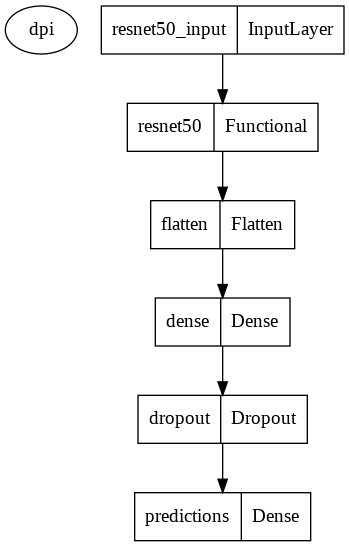

In [10]:
model = models.Sequential()

model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',  name='dense'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax',  name='predictions'))

model.summary()

print('Number of trainable weights : ', len(model.trainable_weights))

plot_model(model, to_file='model.png', dpi=None)
# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

In [11]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# fitting the model
model.fit(train_generator, validation_data = validation_generator, epochs=10,verbose=1)

Epoch 1/10
76/76 [==============================] - 444s 6s/step - loss: 6.3939 - accuracy: 0.0650 - val_loss: 2.2975 - val_accuracy: 0.1628
Epoch 2/10
76/76 [==============================] - 437s 6s/step - loss: 2.2955 - accuracy: 0.1328 - val_loss: 2.2905 - val_accuracy: 0.1744
Epoch 3/10
76/76 [==============================] - 436s 6s/step - loss: 2.2892 - accuracy: 0.1197 - val_loss: 2.2847 - val_accuracy: 0.1744
Epoch 4/10
76/76 [==============================] - 436s 6s/step - loss: 2.2826 - accuracy: 0.1723 - val_loss: 2.2781 - val_accuracy: 0.1744
Epoch 5/10
76/76 [==============================] - 435s 6s/step - loss: 2.2757 - accuracy: 0.1719 - val_loss: 2.2715 - val_accuracy: 0.1744
Epoch 6/10
76/76 [==============================] - 436s 6s/step - loss: 2.2685 - accuracy: 0.1719 - val_loss: 2.2428 - val_accuracy: 0.2180
Epoch 7/10
76/76 [==============================] - 435s 6s/step - loss: 2.2742 - accuracy: 0.1480 - val_loss: 2.2628 - val_accuracy: 0.1744
Epoch 8/10
76

In [12]:
# viewing the model history of loss, accuracy, val_loss, val_accuracy
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
display(metrics)

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,6.393850,0.064967,2.297546,0.162791
1,2.295498,0.132812,2.290545,0.174419
2,2.289153,0.119655,2.284735,0.174419
3,2.282599,0.172286,2.278092,0.174419
4,2.275686,0.171875,2.271519,0.174419
5,2.268516,0.171875,2.242804,0.218023
6,2.274156,0.148026,2.262778,0.174419
7,2.261334,0.100329,2.257468,0.180233
8,2.256718,0.111020,2.253402,0.174419
9,2.252267,0.145970,2.249063,0.180233


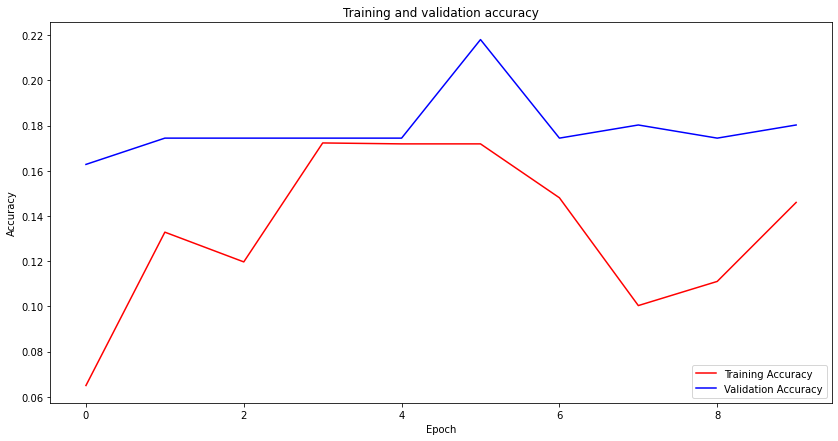

In [13]:
# plotting training and validation accuracy against number of epochs
acc= model.history.history['accuracy']
val_acc= model.history.history['val_accuracy']
loss= model.history.history['loss']
val_loss= model.history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

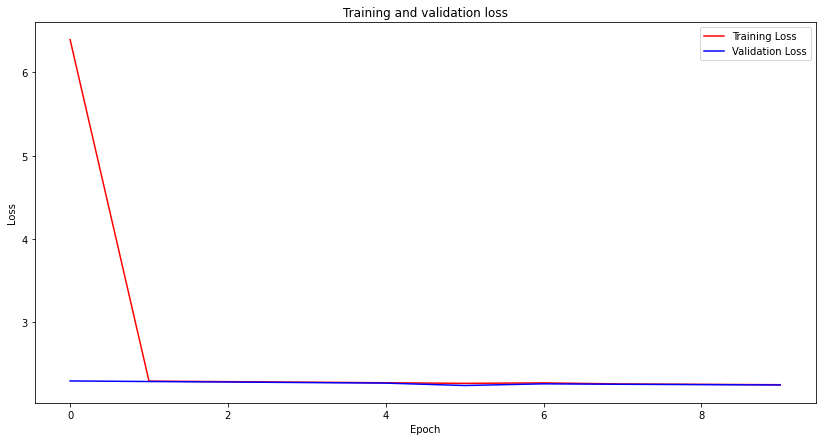

In [14]:
# plotting training and validation loss against number of epochs
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [15]:
# evaluating the model's performance with test dataset
test_loss, test_acc = model.evaluate(test_generator)
print('loss :' ,test_loss, 'acc :' ,test_acc)

23/23 [==============================] - 110s 5s/step - loss: 2.2502 - accuracy: 0.1771
loss : 2.2502200603485107 acc : 0.17705382406711578


In [16]:
# Viewing Precision, recall and f1-score for each of the label
# getting the predicted labels
label_names = ['Form', 'ADVE', 'Memo', 'Letter', 'Resume', 'Note', 'Email', 'Scientific', 'Report', 'News']
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1)

# getting the true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  
report = classification_report(true_classes, predicted_classes, target_names=label_names)
print(report)

23/23 [==============================] - 110s 5s/step
              precision    recall  f1-score   support

        Form       0.00      0.00      0.00        47
        ADVE       0.00      0.00      0.00       120
        Memo       0.00      0.00      0.00        87
      Letter       0.00      0.00      0.00       115
      Resume       0.18      1.00      0.30       125
        Note       0.00      0.00      0.00        39
       Email       0.00      0.00      0.00        41
  Scientific       0.00      0.00      0.00        54
      Report       0.00      0.00      0.00        25
        News       0.00      0.00      0.00        53

    accuracy                           0.18       706
   macro avg       0.02      0.10      0.03       706
weighted avg       0.03      0.18      0.05       706



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 3600x3600 with 0 Axes>

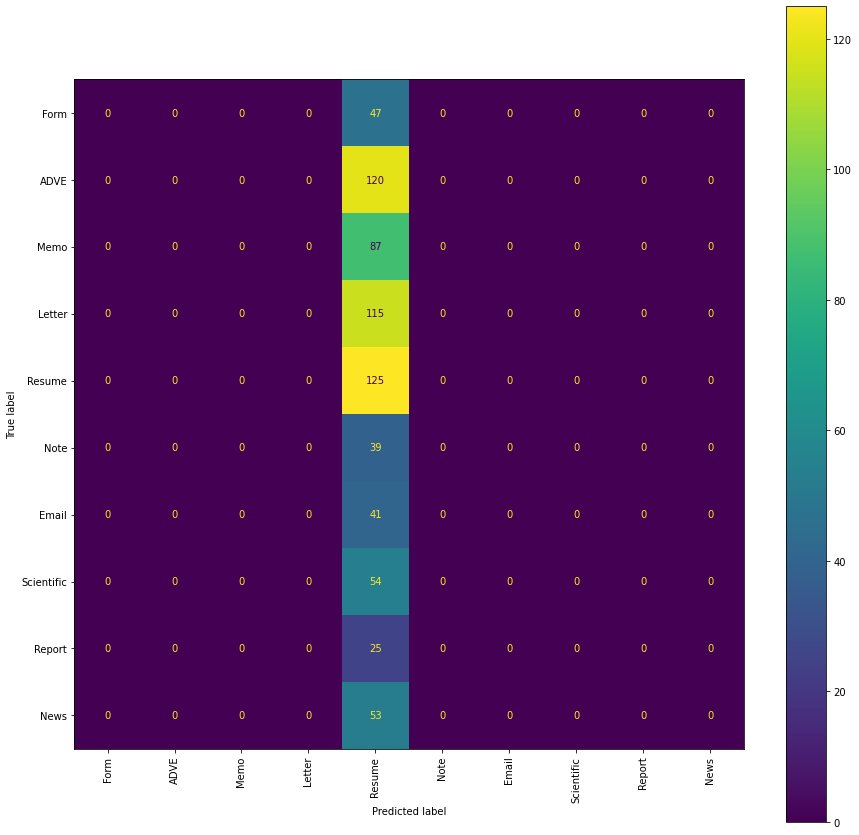

In [17]:
# plotting the confusion matrix
plt.figure(figsize=(50,50))
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,xticks_rotation='vertical')